Problem 3:

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import wrds
import seaborn as sns

In [3]:
db = wrds.Connection(wrds_username='anita97')
db.create_pgpass_file()


WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done


In [45]:
company = {"aapl": 7, "gs": 35048, "msft": 8048, "pg": 21446, "ge": 20792} 
company_names = ["Apple", "Goldman Sachs", "Microsoft", "P&G", "General Eletrics"]

ind = pd.date_range(start="01-01-2001", end="31-12-2018", freq="D")
df = pd.DataFrame(index=ind)

Apple


In [30]:
for key,value in company.items(): # import data for all companies in csv file
    rets = db.raw_sql(f"select date, ret from crsp.dsf where permco in ({value}) and date>='1999-12-31' and date<='2019-12-31'").set_index("date").rename(columns={"ret":key})
    df = pd.merge(df, rets, left_index=True, right_index=True)
    df.to_csv('as2_ex3_data.csv')

In [22]:
wrds_df = pd.read_csv('as2_ex3_data.csv', index_col=0) # read the file
wrds_df.index = pd.to_datetime(wrds_df.index)

a) For each stock compute the mean and variance of daily simple returns

In [68]:
mean = []
var = []
print('We are working with daily simple returns: \n\n')
for company in wrds_df.columns:
    i = wrds_df.columns.get_loc(company) # index
    company_name = company_names[i] # name of that company
    rets = wrds_df[company]
    mean.append(rets.mean())
    var.append(rets.var())
    print('%s: \n' %company_name)
    print('mean = %.5f variance = %.5f \n\n' % (mean[len(mean)-1], var[len(var)-1]))

We are working with daily simple returns: 


Apple: 

mean = 0.00140 variance = 0.00053 


Goldman Sachs: 

mean = 0.00039 variance = 0.00050 


Microsoft: 

mean = 0.00059 variance = 0.00032 


P&G: 

mean = 0.00036 variance = 0.00013 


General Eletrics: 

mean = -0.00010 variance = 0.00037 




b) Plot the empirical density function of stock returns and compare 

1) to the normal distribution with
the same mean and variance as the empirical distribution 

2) the normal
distribution with mean and variance of the `winsorized' empirical distribution.

Apple: 



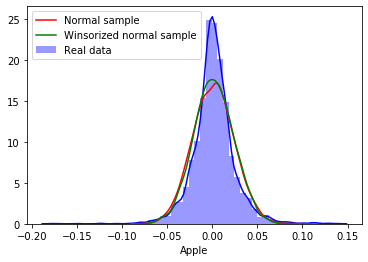




Goldman Sachs: 



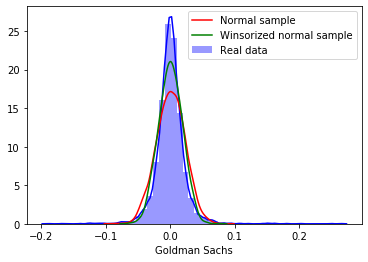




Microsoft: 



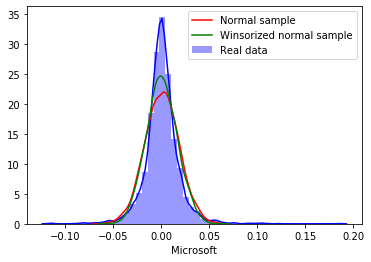




P&G: 



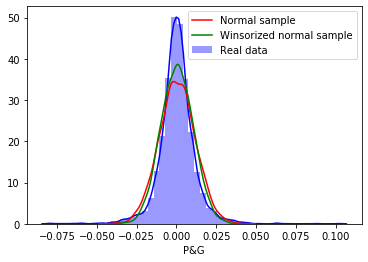




General Eletrics: 



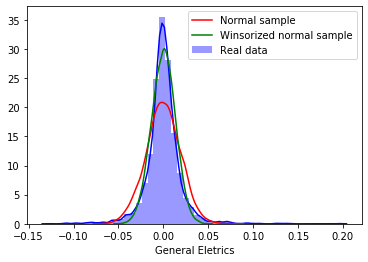

In [115]:
for company in wrds_df.columns:
    rets = wrds_df[company]
    i = wrds_df.columns.get_loc(company) # index
    company_name = company_names[i] # name of that company

    # 1) creation of a normale sample with fixed mean and variance
    mu = mean[i]
    sigma = np.sqrt(var[i])
    lenght = len(rets) # lenght of the normal sample
    normal_sample = pd.Series(np.random.normal(mu, sigma, lenght))

    #2)
    # compute the `winsorized' empirical distribution, simply keep only the daily returns with absolute value less than 4%
    property_wins = rets.between(-0.04, 0.04) # boolean vector
    rets_wins = rets[property_winsorized] # drop false elements (not absolute value less than 4%)
    mu_wins = rets_wins.mean()
    sigma_wins = rets_wins.std()
    # creation of a normale sample with fixed mean_wins and sigma_wins
    lenght_wins = len(rets_wins) # lenght of the normal sample
    normal_sample_wins = pd.Series(np.random.normal(mu_wins, sigma_wins, lenght_wins))

    # plot (using seaborn)
    print('%s: \n' %company_name)
    plt.figure()
    sns.distplot(rets, axlabel=company_name, color='b',label='Real data')
    sns.kdeplot(normal_sample, color='r', label='Normal sample')
    sns.kdeplot(normal_sample_wins, color='g', label='Winsorized normal sample')
    plt.legend()
    plt.show()
    print('\n\n')


(c) For each stock, 

part a) compute the 95% and 99% Value-at-Risk and Conditional Ex-
pected Shortfall from the empirical distribution of returns, 

part b) and compare to the
Value-at-Risk and Conditional Expected Shortfall, that would obtain if the dis-
tributions were normal with corresponding means and variances.


In [116]:
# part a) 

for company in wrds_df.columns:
    rets = wrds_df[company]
    i = wrds_df.columns.get_loc(company) # index
    company_name = company_names[i] # name of that company

    a = rets.quantile(0.99)
    print(a)

# part b)

0.06636510297656059
0.06074127107858653
0.05354262545704827
0.03213769666850559
0.057579272314906046
